# Assigment Python 1
# Data Visualization Using Python
## By : Michael Vincent Efren Malamo

Pada Tugas 1 kami akan melakukan analisis dan visualisasi data pada data kejahatan di london pada tahun 2008 - 2016. pada visualisasi ini kita ingin menjawab pertanyaan-pertanyaan yang sebagai berikut:
1. berapa jumlah kejahatan yang terjadi di london pertahun?
2. Kejahatan apa yang paling banyak terjadi di london?
3. daerah administratif mana yang memiliki tingkat kejahatan paling tinggi di london?
Dan lebih lanjut akan dijabarkan pada visualisasi data.


untuk melakukan analisis data, digunakan Kaggle API untuk mempermudah analisis sehinga perlu mengupload key nya

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"michaelmalamo","key":"a9832d539bee6717457287bdc4e795be"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jboysen/london-crime

100% 121M/121M [00:00<00:00, 150MB/s]
100% 121M/121M [00:00<00:00, 143MB/s]


In [ ]:
! unzip london-crime.zip

Archive:  london-crime.zip
  inflating: london_crime_by_lsoa.csv  


# **1. Data Preparation and Preprocessing**

Semua Liblary yang diperlukan untuk melakukan ekplorasi dan visualisasi data dilakukan pada cell ini

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium
%matplotlib inline


Import data CSV yang telah di ambil dari Kaggle dan melakukan preprocessing data

In [ ]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat kolom dan isi dari dataset untuk mengeti isi dari dataset yang akan di analisis dan di visualisasi

In [ ]:
df.describe

<bound method NDFrame.describe of           lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                

kemudan menggunakan df.info() untuk melihat informasi yang ada didalam dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [ ]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Setelah dilakukan pengecekan nilai null, kita tidak menemukan nilai null pada dataset kali ini sehingga kita bisa lanjut menuju visualisasi data

# **2. Data Visualization**

## **A. Line plot**
setelah kita mengerti tentang dataset ini dan sudah memastikan bahwa dataset sudah layak untuk dilakukan visualisasi kita mulai melakukan visualisasi data menggunakan matplotlib. pada visualisasi pertama ini kami menggunakan plot garis untuk mengertahui tingkat kejahatan yang terjadi di london dalam rentang tahun.

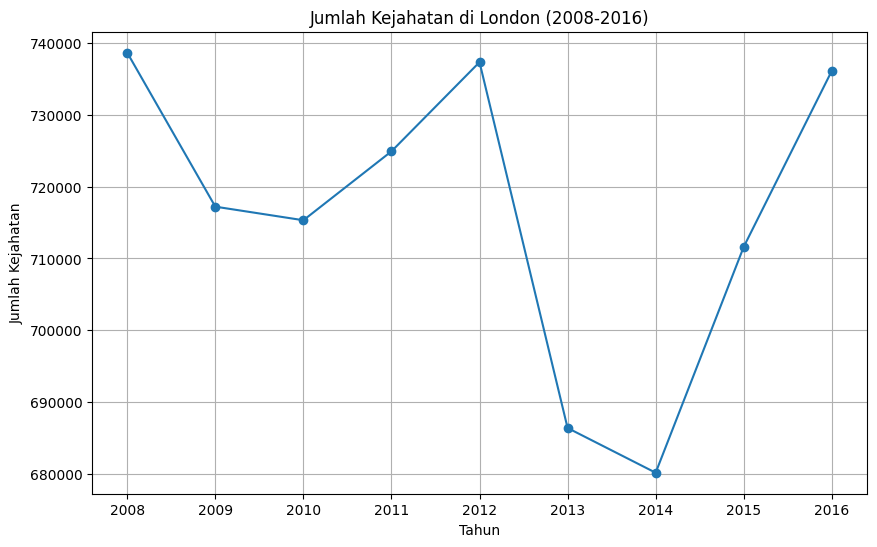

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah kejahatan
crime_by_year = df.groupby('year')['value'].sum()

# Membuat plot garis
plt.figure(figsize=(10, 6))
plt.plot(crime_by_year.index, crime_by_year.values, marker='o')
plt.title('Jumlah Kejahatan di London (2008-2016)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.grid(True)
plt.show()

Kita dapat melihat bahwa pola kejahatan yang terjadi di london mengalami kenaikan dan penurunan. seperti pada tahun 2008 sampai 2010 terjadi penururunan kemudian naik lagi. dan pada tahun 2012 terjadi penurunan drastis jumlah kejahatan kemudian terjadi tren naik lagi hingga 2016

## **B. Histogram**

setelah mengetahui tingkat kejahatan per tahun di london, kami ingin mengetahui jenis kejahatan apa saja yang ada di london dengan cara mengkategorikan kejahatan yang ada dan menghitung jumlahnya.

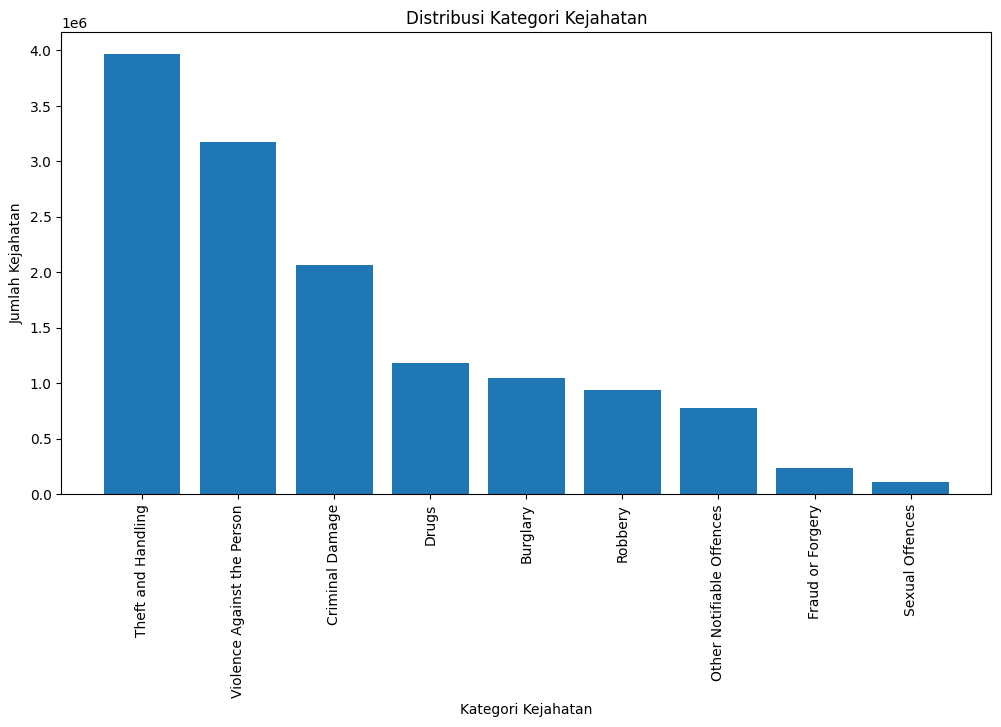

In [ ]:
# Mengelompokkan data berdasarkan kategori kejahatan dan menghitung jumlahnya
crime_by_category = df['major_category'].value_counts()

# Membuat histogram
plt.figure(figsize=(12, 6))
plt.bar(crime_by_category.index, crime_by_category.values)
plt.title('Distribusi Kategori Kejahatan')
plt.xlabel('Kategori Kejahatan')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)
plt.show()

Setelah melakukan visualisasi data dengan menggunakan histogram diatas, kita bisa mengetahui bahwa tingkat kategori kejahatan tertinggi itu dari kategori "Theft and Handling"

## **C.Bar Chart**

Setelah itu kami ingin mengetahui tingkat kejahatan di london berdasarkan daerah administratifnya atau disebut "Borough". untuk mengetahui hal itu kami menggunakan plot batang horizontal.

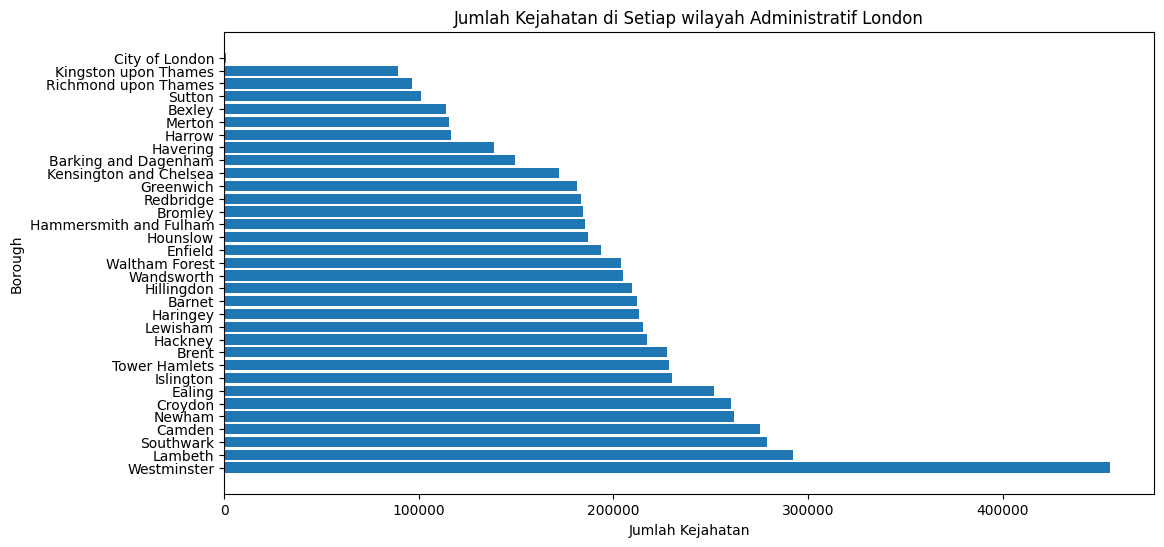

In [ ]:
# Mengelompokkan data berdasarkan borough dan menghitung jumlah kejahatan
crime_by_borough = df.groupby('borough')['value'].sum().sort_values(ascending=False)

# Membuat plot batang horizontal
plt.figure(figsize=(12, 6))
plt.barh(crime_by_borough.index, crime_by_borough.values)
plt.title('Jumlah Kejahatan di Setiap wilayah Administratif London')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Borough')
plt.show()

dari hasil visualisasi menggunakan plot batang, kita bisa mengetahui bahwa Wilayah "WestMinster" memiliki jumlah kejahatan tertinggi yaitu melebihi 400 ribu

## **D. Heatmap**

Kami juga ingin mengelompokan data kejahatan ini berdasarkan tahun dan bulan kemudian menghitung jumlah kejahatan menggunakan heatmap

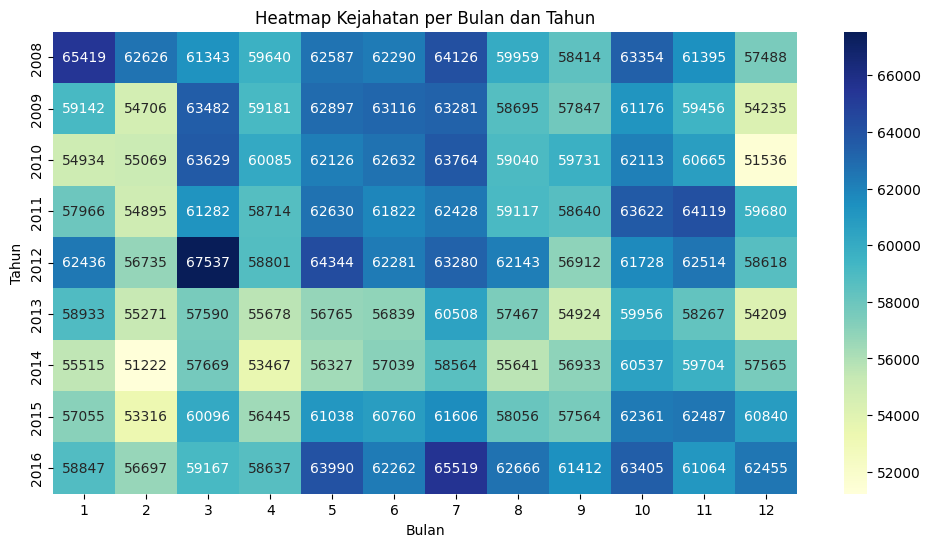

In [ ]:
# Mengelompokkan data berdasarkan tahun dan bulan, dan menghitung jumlah kejahatan
crime_heatmap = df.pivot_table(index='year', columns='month', values='value', aggfunc='sum')

# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_heatmap, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Heatmap Kejahatan per Bulan dan Tahun')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

berdasarkan data di atas, kita bisa melihat pada tahun 2012 bulan 3 merupakan tingkat tertinggi kejahatan yang terjadi pada kota london dengan jumlah kejahatan mencapai 67.537 ribu kasus kejahatan.

## **E.Words Clouds**
Kita menggunakan words Clouds untuk melihat kategori kejahatan yang paling umum terjadi di london


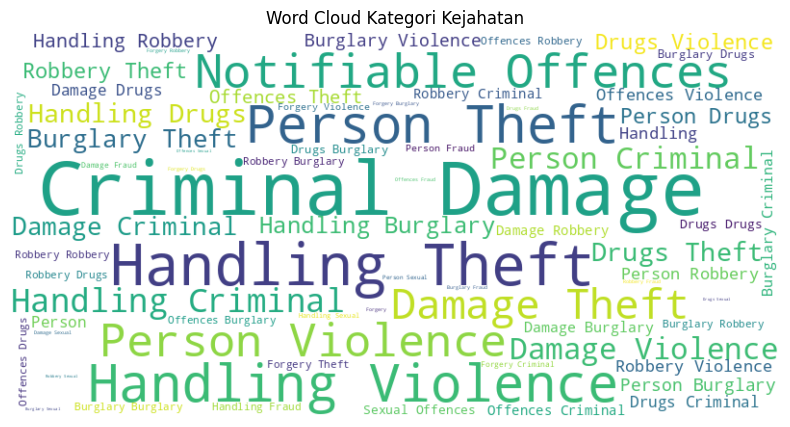

In [ ]:
# Mengelompokkan data berdasarkan kategori kejahatan dan menghitung jumlahnya
crime_categories = df['major_category'].str.cat(sep=' ')

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(crime_categories)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kategori Kejahatan')
plt.show()

## **F.Box Plot**
Kemudian kami juga ingin mengetahui jumlah kejahatan utama yang terjadi didaerah london menggunakan box plot.

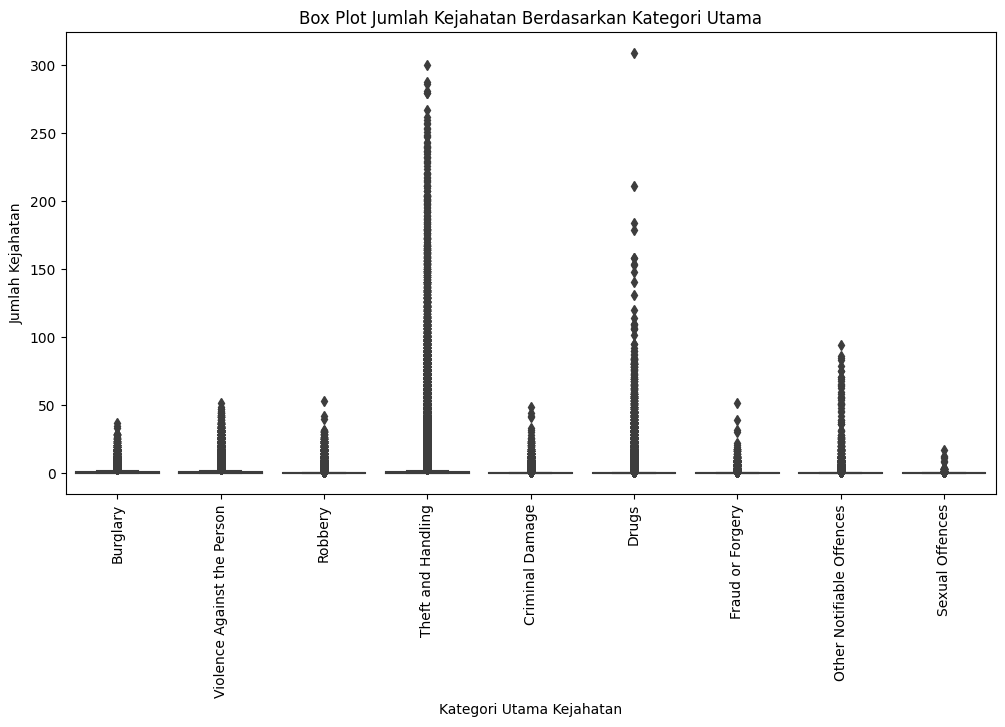

In [ ]:
# Membuat box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='major_category', y='value', data=df)
plt.title('Box Plot Jumlah Kejahatan Berdasarkan Kategori Utama')
plt.xlabel('Kategori Utama Kejahatan')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)  # Memutar label sumbu x untuk membaca dengan lebih baik
plt.show()

ditemukan bahwa jumlah kejahatan berdasarkan ketegori utama diduduki oleh kejahatan kategori "Theft and Handling"

## **G.Pie Chart**
Kami juga menggunakan pie chart untuk mengemompokkan data berdasarkan kategori kejahatan dan menghitung jumlahnya.

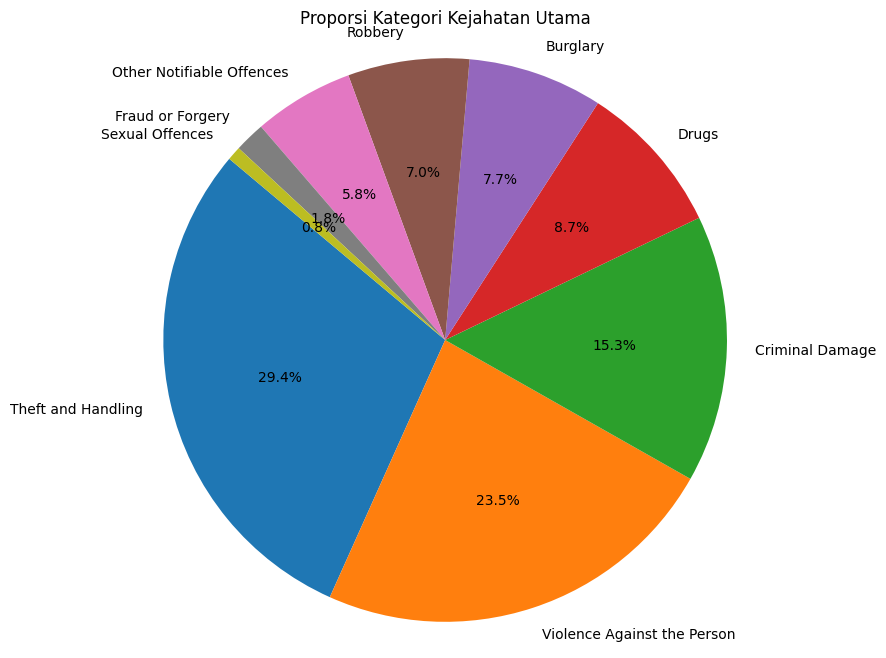

In [ ]:
# Mengelompokkan data berdasarkan kategori kejahatan utama dan menghitung jumlahnya
crime_by_category = df['major_category'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_by_category, labels=crime_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Kategori Kejahatan Utama')
plt.axis('equal')  # Membuat lingkaran menjadi bulat
plt.show()

## **H. Scatter Plot**
kemudian kami menggunakan scaterplot untuk dapat mengetahui jumlah kejahatan pertahun di london.

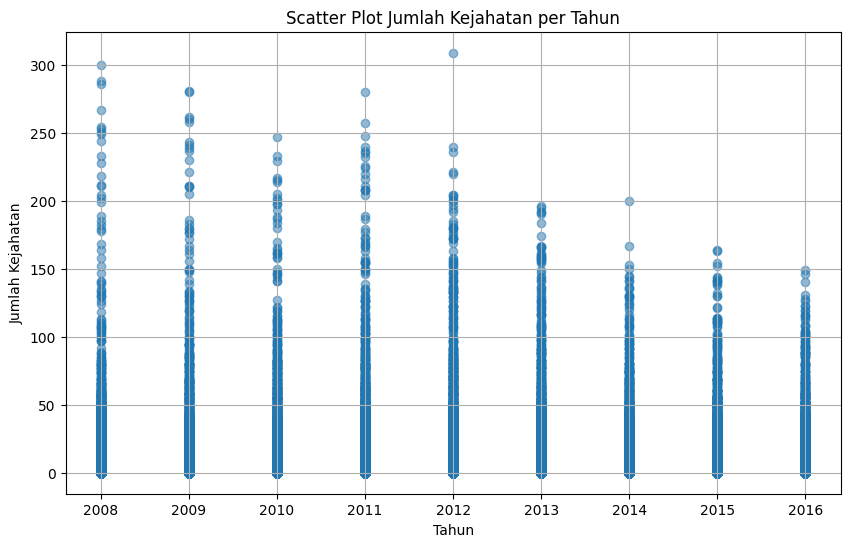

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['value'], alpha=0.5, marker='o')
plt.title('Scatter Plot Jumlah Kejahatan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.grid(True)
plt.show()

## **I. Area Plot**
kami juga ingin mengelomppokkan data berdasarkan tahun kemudian menggunakan area plot untuk mengetahui jumlah kejahatan yang terjadi per tahun

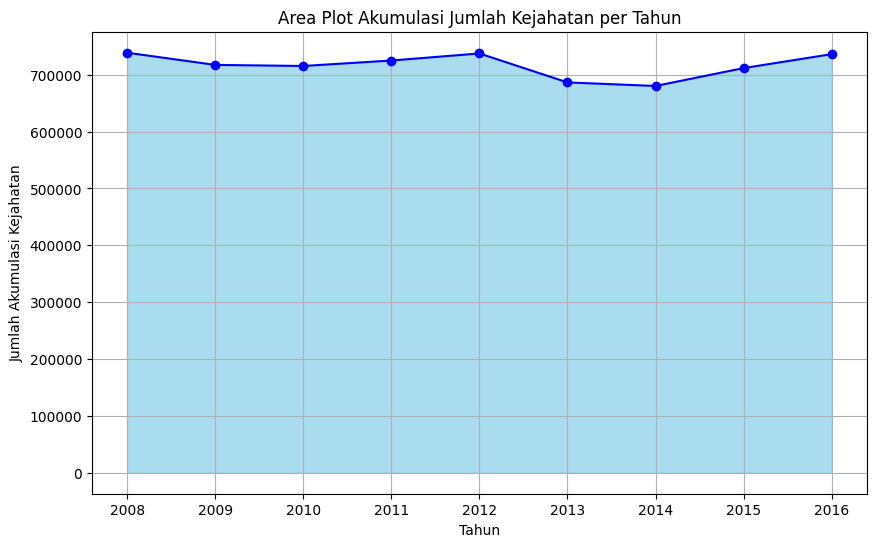

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah kejahatan per tahun
crime_by_year = df.groupby('year')['value'].sum()

# Membuat area plot
plt.figure(figsize=(10, 6))
plt.fill_between(crime_by_year.index, crime_by_year.values, color='skyblue', alpha=0.7)
plt.plot(crime_by_year.index, crime_by_year.values, marker='o', color='blue')
plt.title('Area Plot Akumulasi Jumlah Kejahatan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Akumulasi Kejahatan')
plt.grid(True)
plt.show()


## kesimpulan
Dari proses visualisasi data yang telah dilakukan, dapat ditemukan jawaban bahwa dari data yang telah di analisis diketahui bahwa:
1. Salah Satu kejahatan yang banyak terjadi di London selama 2008 hingga 2016 ialah kejahatan kategori Theft and Handling dengan persentase 29,4 % dari jumlah kejahatan utama yang terjadi di london
2. Jumlah Kejahatan di Setiap wilayah Administratif London tertinggi diduduki oleh Westminster, kemudian posisi kedua oleh Lambath dan ketiga ialah Camben.
3. berdasarkan data pada heatmap, pada tahun 2012 bulan 3 merupakan tingkat tertinggi kejahatan yang terjadi pada kota london dengan jumlah kejahatan mencapai 67.537 ribu kasus kejahatan.
4. Berdasarkan visualisasi Line Plot, Kita dapat melihat bahwa pola kejahatan yang terjadi di london mengalami kenaikan dan penurunan. seperti pada tahun 2008 sampai 2010 terjadi penururunan kemudian naik lagi. dan pada tahun 2012 terjadi penurunan drastis jumlah kejahatan kemudian terjadi tren naik lagi hingga 2016